In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [5]:
def f(x,y):
    return (1+x)**2 + 100*(y-x**2)**2

def gradient(x,y):
    dx = -400*x*y + 400*x**3 +2*x-2
    dy = 200*y -200*x**2
    return np.array([dx,dy])

def GradientDescent(Grad,x,y, eta=0.0012,epsilon=0.001,nMax=1000):
    i=0
    pos_x,pos_y,pos_count = np.empty(0),np.empty(0),np.empty(0)
    error=1
    sol=np.array([x,y])
    
    while np.linalg.norm(error)>epsilon and i < nMax:
        i+=1
        pos_x = np.append(pos_x,x)
        pos_y = np.append(pos_y,y)
        pos_count = np.append(pos_count,i)
        sol_prev = sol
        sol = sol - eta*Grad(x,y)
        error = sol - sol_prev
        x, y = sol[0], sol[1]
        
    print('최저점의 위치 : ', sol)
    return sol, pos_x, pos_y, pos_count

최저점의 위치 :  [0.44455055 0.19485836]


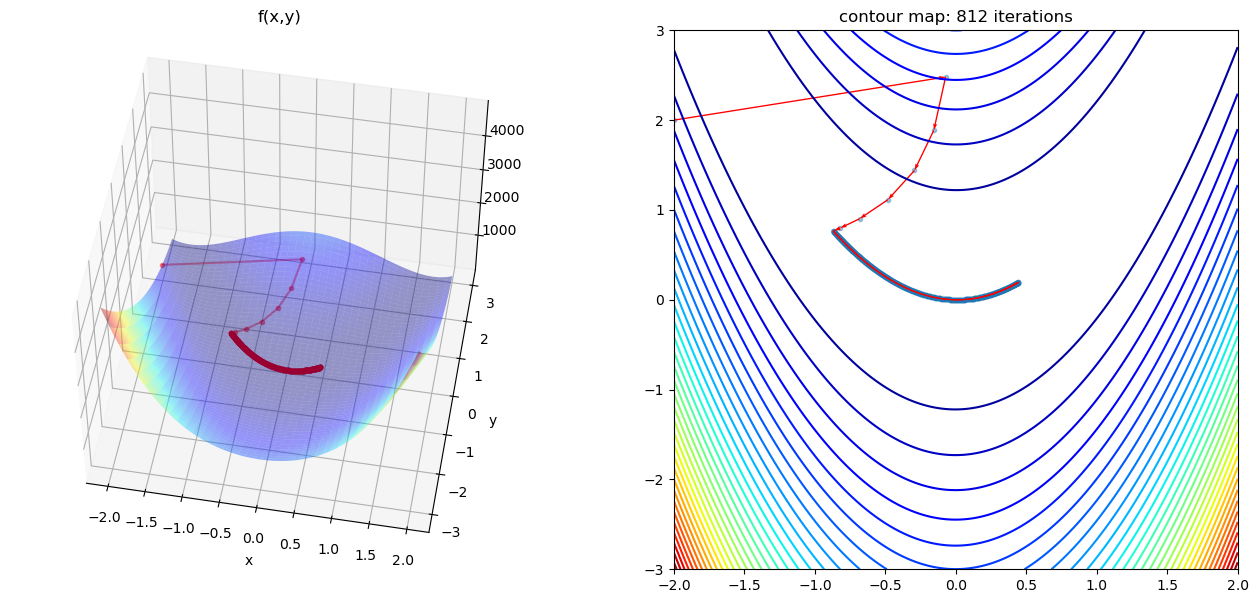

In [8]:
solution, pos_x, pos_y, pos_count = GradientDescent(gradient, -2,2)

x = np.linspace(-2,2,200)
y = np.linspace(-3,3,300)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
anglesx = pos_x[1:] - pos_x[:-1] # quiver plot 에 사용할 벡터의 X 방향
anglesy = pos_y[1:] - pos_y[:-1] # quiver plot 에 사용할 벡터의 y 방향

%matplotlib inline
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_surface(X,Y,Z,rstride=5, cstride=5, cmap = 'jet', alpha=.4)
ax.plot(pos_x,pos_y,f(pos_x,pos_y),color='r',marker='.', alpha=.4)
ax.view_init(50,280)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('f(x,y)')

ax = fig.add_subplot(1,2,2)
ax.contour(X,Y,Z,40,cmap ='jet') # 등고선 지도 
ax.scatter(pos_x,pos_y,marker='.', alpha=.4)
ax.quiver(pos_x[:-1],pos_y[:-1],anglesx,anglesy,scale_units='xy',angles='xy',scale=1,color='r')
ax.set_title('contour map: {} iterations'.format(len(pos_count)))

plt.show()